<a href="https://colab.research.google.com/github/KosolCHOU/Complete-Data-Science-Training/blob/main/The_Elbow_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of cluster anaysis

## Import relevent libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [8]:
data = pd.read_csv("3.01.+Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


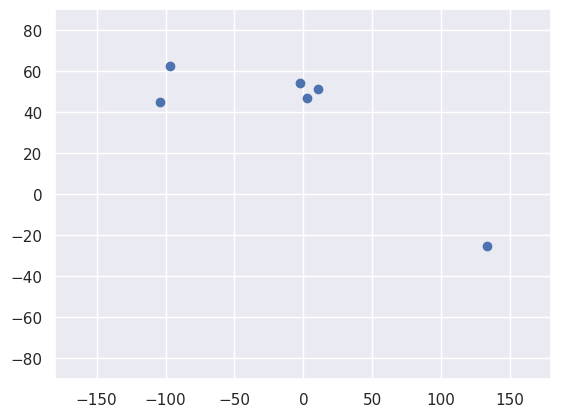

In [9]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Map the data

In [10]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped['Language'].map({"English":0,"French":1,"German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select the features

In [11]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [12]:
kmeans = KMeans(2)

In [13]:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [14]:
indentified_clusters = kmeans.fit_predict(x)
indentified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [15]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = indentified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


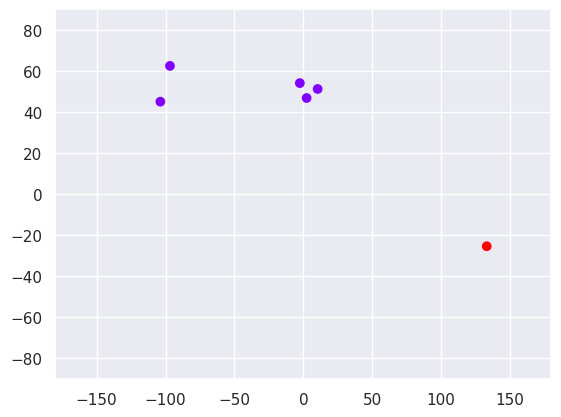

In [16]:
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCS

In [19]:
kmeans.inertia_

13208.958119999996

In [26]:
wcss = []

for i in range(1, 7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcs_iter = kmeans.inertia_
  wcss.append(wcs_iter)

In [27]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method



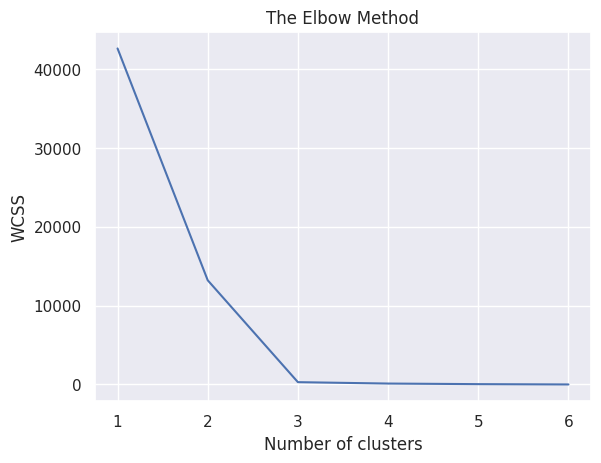

In [29]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") # WCSS = Within-Cluster Sum of Square
plt.show()